Cross-validation is a great way to estimate how well does a model generalize to new, unseen data. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both (training, CV), then your model is underfitting. This is one way to tell if a model is too simple or complex.

Another way is to look at the learning curves, which are plots of the model's training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results.

If the model cannot be trained incrementally (i.e., if it does not support `partial_fit()` or `warm_start()`), then you must train it several times on gradually larger subsets of the training set.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 2 + 0.5 * X**2 + X + np.random.randn(100, 1)

In [5]:
train_sizes, train_scores, valid_scores = learning_curve(estimator=LinearRegression(fit_intercept=True),
                                                         X=X,
                                                         y=y,
                                                         train_sizes=np.linspace(0.01, 1.0, 40),
                                                         cv=5,
                                                         scoring='neg_root_mean_squared_error')

In [26]:
print(train_sizes.shape)
print(train_sizes)

(40,)
[ 1  2  4  6  8 10 12 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 80]


- (n_unique_ticks,): numbers of training examples that has been used to generate the learning curve.
- Note that the number of ticks might be less than n_ticks because duplicate entries will be removed.

In [16]:
train_scores.shape

(40, 5)

- (n_ticks, n_cv_folds): scores on training sets.

In [14]:
valid_scores.shape

(40, 5)

- (n_ticks, n_cv_folds): scores on test (validation) set.

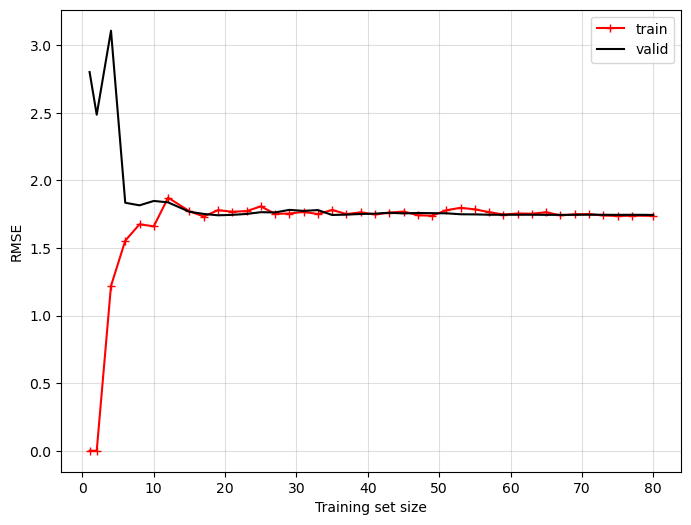

In [32]:
train_errors = -np.mean(train_scores, axis=1)
valid_errors = -np.mean(valid_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_errors, 'r-+', label='train', zorder=2)
plt.plot(train_sizes, valid_errors, 'k-', label='valid', zorder=3)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.grid(True, alpha=0.4, zorder=1)
plt.legend();

- Poor performance on both training and CV $\, \boldsymbol{\rightarrow} \,$ underfitting.
- Note that the true relationship between $\, \boldsymbol{X} \,$ and $\, \boldsymbol{y} \,$ is quadratic in nature, so it is expected that a plain linear regression won't perform well.

In [10]:
def plot_learning_curve(X, y, deg, sizes, num_folds, metric, squeeze_y_lim=False):
    
    model = make_pipeline(PolynomialFeatures(degree=deg, include_bias=False), 
                          LinearRegression(fit_intercept=True))
    
    train_sizes, train_scores, valid_scores = learning_curve(estimator=model,
                                                             X=X,
                                                             y=y,
                                                             train_sizes=sizes,
                                                             cv=num_folds,
                                                             scoring=metric)
    
    train_errors = -np.mean(train_scores, axis=1)
    valid_errors = -np.mean(valid_scores, axis=1)
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_errors, 'r-+', label='train', zorder=2)
    plt.plot(train_sizes, valid_errors, 'k-', label='valid', zorder=3)
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.grid(True, alpha=0.4, zorder=1)
    plt.legend();
    
    if squeeze_y_lim:
        plt.ylim(0, 2.5)

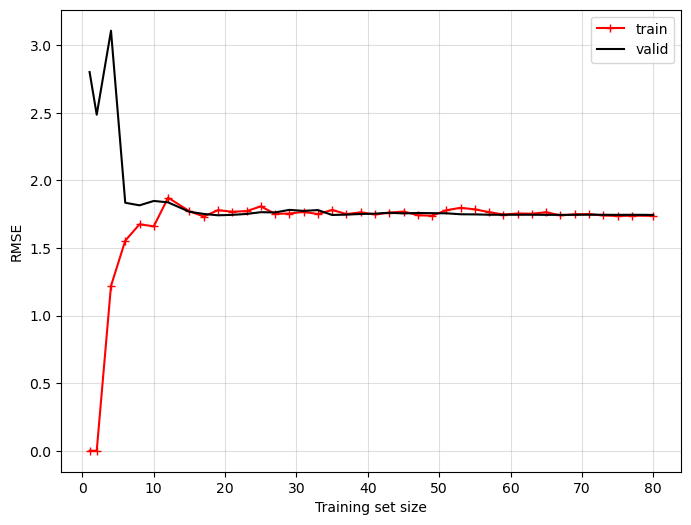

In [11]:
plot_learning_curve(X=X, 
                    y=y, 
                    deg=1, 
                    sizes=np.linspace(0.01, 1.0, 40),
                    num_folds=5,
                    metric='neg_root_mean_squared_error')

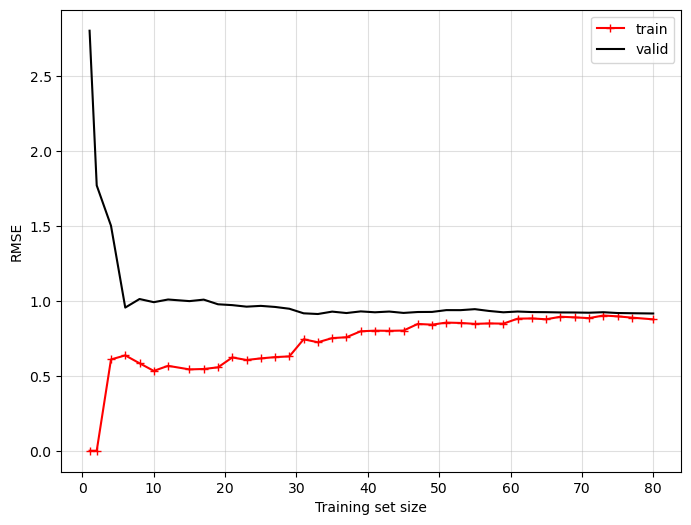

In [12]:
plot_learning_curve(X=X, 
                    y=y, 
                    deg=2, 
                    sizes=np.linspace(0.01, 1.0, 40),
                    num_folds=5,
                    metric='neg_root_mean_squared_error')

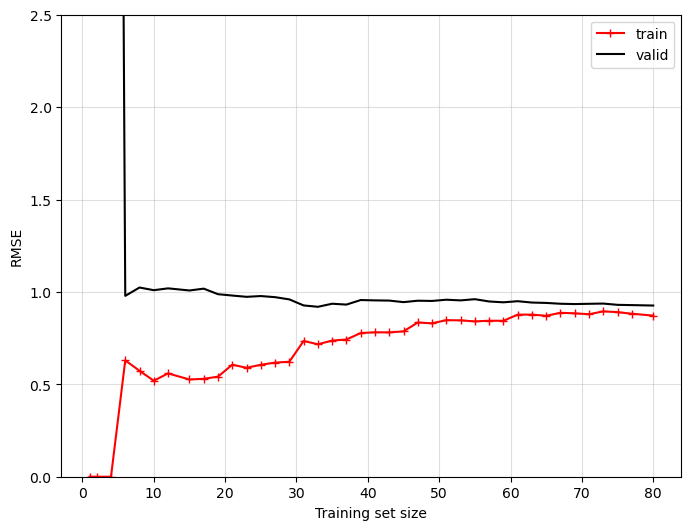

In [13]:
plot_learning_curve(X=X, 
                    y=y, 
                    deg=3, 
                    sizes=np.linspace(0.01, 1.0, 40),
                    num_folds=5,
                    metric='neg_root_mean_squared_error',
                    squeeze_y_lim=True)

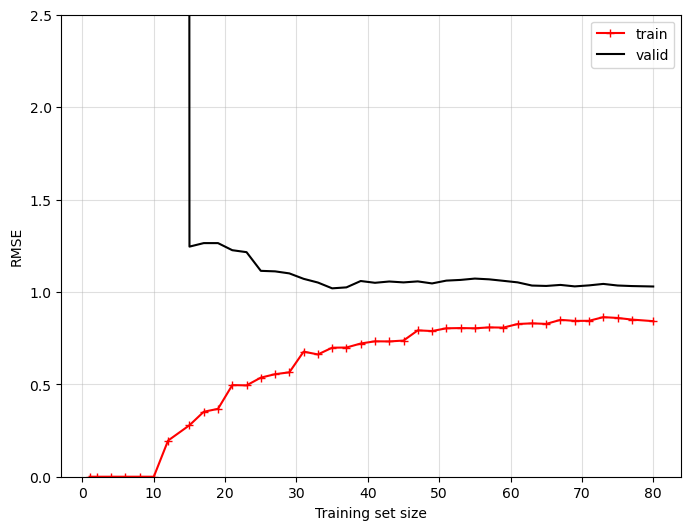

In [14]:
plot_learning_curve(X=X, 
                    y=y, 
                    deg=10, 
                    sizes=np.linspace(0.01, 1.0, 40),
                    num_folds=5,
                    metric='neg_root_mean_squared_error',
                    squeeze_y_lim=True)

- Typical overfitting phenomena; the training error is much lower than the validation error (i.e., the model performs much better on the training data than on the validation data).
- Options here are to get more data or to make the model less complex.